In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
sys.path.append("../")

from src.data_loader import load_raw_data
df = load_raw_data("../data/raw/customer_support_tickets.csv")

print("Shape:", df.shape)
df.head()

Shape: (8469, 17)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,3/22/2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,6/1/2023 12:15,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,5/22/2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,6/1/2023 16:45,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,7/14/2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,6/1/2023 11:14,6/1/2023 18:05,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,11/13/2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,6/1/2023 7:29,6/1/2023 1:57,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2/4/2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,6/1/2023 0:12,6/1/2023 19:53,1.0


In [3]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [4]:
df["Ticket Type"].nunique()

5

In [5]:
df["Ticket Type"].value_counts()

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

In [6]:
df["Ticket Priority"].value_counts()

Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64

In [7]:
df["text_length"] = df["Ticket Description"].astype(str).apply(lambda x: len(x.split()))

df["text_length"].describe()

count    8469.000000
mean       46.467352
std         8.461730
min        21.000000
25%        43.000000
50%        49.000000
75%        52.000000
max        63.000000
Name: text_length, dtype: float64

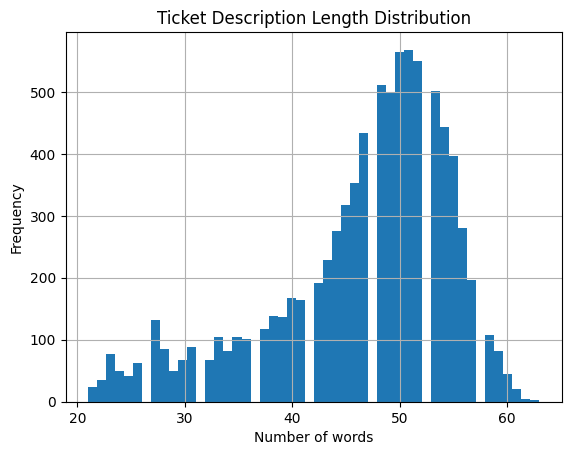

In [8]:
plt.figure()
df["text_length"].hist(bins=50)
plt.title("Ticket Description Length Distribution")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

In [9]:
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, project_root)

In [10]:
from src.data_loader import load_raw_data
from src.data_cleaning import clean_data

df_raw = load_raw_data("../data/raw/customer_support_tickets.csv")
df_clean = clean_data(df_raw)

print("Raw shape:", df_raw.shape)
print("Clean shape:", df_clean.shape)
df_clean.head()

Raw shape: (8469, 17)
Clean shape: (8469, 10)


,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Status,Ticket Priority,Ticket Channel,text
0,1,32,Other,GoPro Hero,3/22/2021,Technical issue,Pending Customer Response,Critical,Social media,Product setup I'm having an issue with the {pr...
1,2,42,Female,LG Smart TV,5/22/2021,Technical issue,Pending Customer Response,Critical,Chat,Peripheral compatibility I'm having an issue w...
2,3,48,Other,Dell XPS,7/14/2020,Technical issue,Closed,Low,Social media,Network problem I'm facing a problem with my {...
3,4,27,Female,Microsoft Office,11/13/2020,Billing inquiry,Closed,Low,Social media,Account access I'm having an issue with the {p...
4,5,67,Female,Autodesk AutoCAD,2/4/2020,Billing inquiry,Closed,Low,Email,Data loss I'm having an issue with the {produc...


In [11]:
df_clean["text"].head()

0    Product setup I'm having an issue with the {pr...
1    Peripheral compatibility I'm having an issue w...
2    Network problem I'm facing a problem with my {...
3    Account access I'm having an issue with the {p...
4    Data loss I'm having an issue with the {produc...
Name: text, dtype: str